<a href="https://colab.research.google.com/github/kaveku/test-live-coding/blob/master/Angela_Munyao_Linear_regression_Regualarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class Dataset:
  def __init__(self, path, test_size=0.85):
    self.test_size = test_size
    if path==None:
        self.train_inputs = []
        self.test_inputs = []
        self.train_targets = []
        self.test_targets = []
    else:
        self.initialize(path)
    
  def initialize(self, path):
    data = pd.read_csv(path,  encoding='latin-1')
    
    #Fill all the NAN values with the mean
    for col in data.columns:
      if data[col].isna().sum()!=0:
        data[col][data[col].isna()] = data[col].mean()
        
    data = data.drop(['Geography', 'binnedInc'], axis=1)
    
    target = data["TARGET_deathRate"].values
    inputs = data.drop("TARGET_deathRate", axis=1)


    #here we add more features
    for col in inputs.columns:
      for i in range(2,10):
        new_col = f'{col}_{i}' 
        inputs[new_col] =  inputs[col]**i

    inputs = inputs.values
    inputs = inputs/inputs.max(axis=0)
    self.target = target
    self.inputs = inputs
    
    #Shuffle before splitting the data
    indices = np.arange(len(self.target))
    np.random.shuffle(indices)
    test_num_points = int(self.test_size * len(indices))
    test_indices = indices[:test_num_points]
    train_indices = indices[test_num_points:]

    self.train_inputs = self.inputs[train_indices]
    self.test_inputs = self.inputs[test_indices]
    self.train_targets = self.target[train_indices]
    self.test_targets = self.target[test_indices]

In [8]:
dataset = Dataset("cancer_reg.csv") #"cancer-mortality-rate.csv

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [9]:
class LinearRegressionModel:
  def __init__(self, epochs=10000):
    self.epochs = epochs
    #initialize the parameters randomly

  def add_one(self, x):
    x_new=np.hstack([np.ones((x.shape[0], 1)), x])
    return x_new

  def predict(self, x, theta):
    y_pred=x@theta
    return y_pred

  def compute_mse_loss(self, x_train, y_train, theta):
    mse=(np.sum(((x_train@theta)-y_train)**2)/2)
    return mse

  def plot_loss_and_params(self, train_losses, test_losses):

    fig, (ax1) = plt.subplots(1, 1, figsize=(20,4))

    ax1.plot(train_losses[10:], label="train-loss")
    ax1.plot(test_losses[10:], label="test-loss")
    ax1.set_title('loss')

    plt.show()

  def train(self, x_train, y_train, x_test, y_test, batch_size, lr, l1, l2):
    #print(x_train.shape, y_train.shape)

    train_losses = []
    test_losses = []
    n=x_train.shape[0]
    d=x_train.shape[1]

    batch_num=int(n/batch_size)

    theta=np.zeros((d, 1))

    for i in range(self.epochs):
      #print(x_train.shape, y_train.shape)
      a=np.c_[x_train,y_train]    
      np.random.shuffle(a)

      x_train_shuffled=a[:,:-1]
      y_train_shuffled= a[:,-1]

      for j in range(batch_num):
        x_train_new=x_train_shuffled[j*batch_size:j*batch_size+batch_size]       
        y_train_new=y_train_shuffled[j*batch_size:j*batch_size+batch_size]
        y_train_new=y_train_new.reshape(-1,1)

        mse_train=self.compute_mse_loss(x_train_new, y_train_new, theta)
        #print(theta)
        mse_test=self.compute_mse_loss(x_test, y_test, theta)

        a= x_train_new@theta
        b=a-y_train_new
        grad=x_train_new.T@b
        theta_new= (theta-(1/batch_num)*lr*grad) 
        
        theta=theta_new
        
      train_losses.append(mse_train)
      #print(mse_train)
      test_losses.append(mse_test)

    plt.figure()
    plt.plot(np.arange(self.epochs), train_losses, c='blue')
    plt.xlabel('Iterations')
    plt.ylabel('Cost, ' + r'$J(\theta)$')

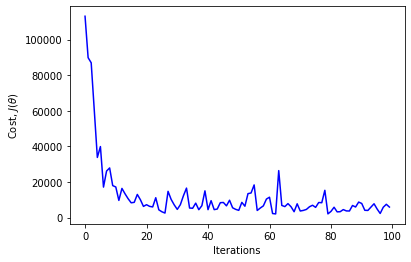

In [10]:
model = LinearRegressionModel(epochs=100)
model.train(dataset.train_inputs, dataset.train_targets, dataset.test_inputs, dataset.test_targets,10, 0.001, 0, 0)

In [ ]:
#L No regularization
#High Variance can be observed from the graph 

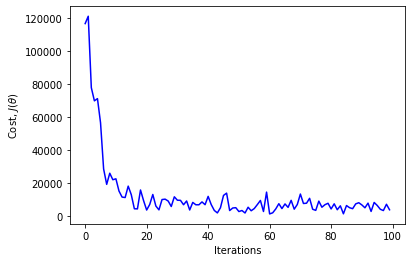

In [528]:
model = LinearRegressionModel(epochs=100)
model.train(dataset.train_inputs, dataset.train_targets, dataset.test_inputs, dataset.test_targets,10, 0.001, 4, 0)

In [ ]:
#L1
#Less Variance can be observed from the graph as compare to the first curve without regularization

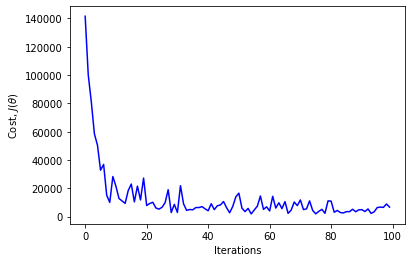

In [11]:
model = LinearRegressionModel(epochs=100)
model.train(dataset.train_inputs, dataset.train_targets, dataset.test_inputs, dataset.test_targets,10, 0.001, 0, 4)

In [ ]:
#L2
#Less Variance can be observed from the graph as compare to the first curve without regularization

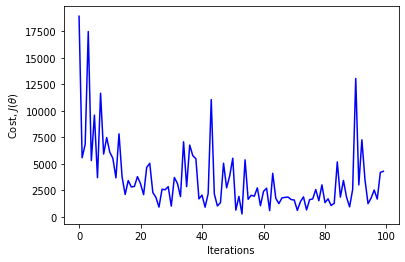

In [13]:
model = LinearRegressionModel(epochs=100)
model.train(dataset.train_inputs, dataset.train_targets, dataset.test_inputs, dataset.test_targets,10, 0.01, 4, 4)

In [ ]:
#L1-L2
#Less Variance can be observed from the graph as compare to the first curve without regularization